## Esse notebook resolve a questão 1 da seção 8.1 do livro de exercícios

##### _Diogo Tuler Chaves_

### Imports

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
import seaborn as sns


### Abrindo dados 

In [2]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    images = []
    labels = []
    for line in lines:
        entrance = list(map(float, line.split()))
        label = int(entrance[0])
        pixels = entrance[1:]
        image = np.array(pixels)
        images.append(image)
        labels.append(label)
    
    return images,labels

In [3]:
train_data, train_label = read_file("/home/diogo/Documents/TP_PCA/data/zip.train")

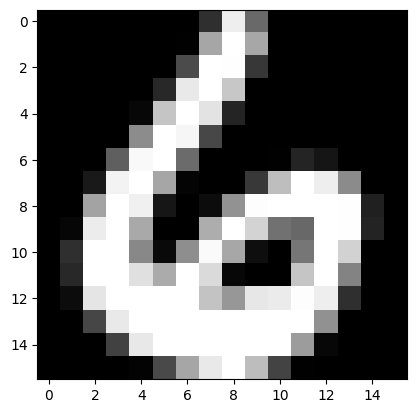

In [4]:
plt.imshow(train_data[0].reshape(16,16), cmap='gray')

In [5]:
test_data, test_label = read_file("/home/diogo/Documents/TP_PCA/data/zip.test")

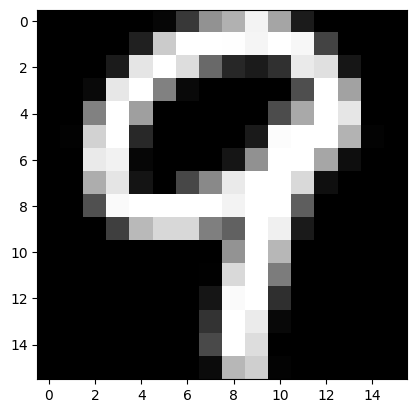

In [6]:
plt.imshow(test_data[0].reshape(16,16), cmap='gray')

### Fazendo o PCA

In [7]:
def Pca_data(data,numero_de_autovalores):
    matriz_covariancia_treino = np.cov(data, rowvar=False)
    autovalores, autovetores = np.linalg.eigh(matriz_covariancia_treino)
    indices_ordenados = np.argsort(autovalores)[::-1]
    autovalores_ordenados = autovalores[indices_ordenados]
    autovetores_ordenados = autovetores[:, indices_ordenados]
    autovetores_usados = autovetores_ordenados[:,0:numero_de_autovalores]
    autovalores_usados = autovalores_ordenados[0:numero_de_autovalores]
    train_data_pos_pca = train_data @ autovetores_usados
    return train_data_pos_pca,autovetores_usados

In [8]:
def Aplicar_Pca_teste(data_teste, autovetores_usados):
    data_teste_pos_pca = data_teste @ autovetores_usados
    return data_teste_pos_pca


### Função para avaliação dos modelos

In [9]:
def Avaliar_resultado(y_pred):
    cm = confusion_matrix(test_label, y_pred)


    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Escala da fonte para melhor legibilidade

    # Plotar heatmap da matriz de confusão
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={'size': 14}, square=True,
                xticklabels=["0","1","2","3","4","5","6","7","8","9"], yticklabels=["0","1","2","3","4","5","6","7","8","9"])

    plt.xlabel('Classe Prevista', fontsize=14)
    plt.ylabel('Classe Verdadeira', fontsize=14)
    plt.title('Matriz de Confusão', fontsize=16)
    plt.show()
    sns.set(font_scale=1.0) 
    plt.rcParams.update(plt.rcParamsDefault)

    cr = classification_report(test_label, y_pred)
    print("\nRelatório de Classificação:")
    print(cr)

### Treinando e testando um SVM para cada k

In [10]:
y_preds = []

#### k = 5

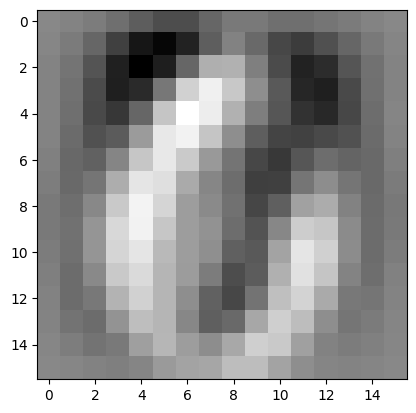

In [11]:
svm_classifier_5 = SVC(kernel='linear', C=1.0) 
train_data_pos_pca_5,autovetores_usados_5 = Pca_data(train_data,5)
plt.imshow((train_data_pos_pca_5 @ autovetores_usados_5.T)[0].reshape(16,16), cmap='gray')
plt.show()

In [12]:
svm_classifier_5.fit(train_data_pos_pca_5, train_label)

SVC(kernel='linear')

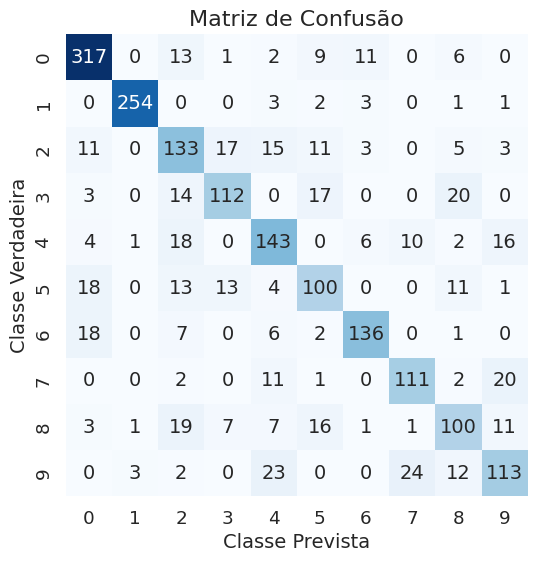


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       359
           1       0.98      0.96      0.97       264
           2       0.60      0.67      0.63       198
           3       0.75      0.67      0.71       166
           4       0.67      0.71      0.69       200
           5       0.63      0.62      0.63       160
           6       0.85      0.80      0.82       170
           7       0.76      0.76      0.76       147
           8       0.62      0.60      0.61       166
           9       0.68      0.64      0.66       177

    accuracy                           0.76      2007
   macro avg       0.74      0.73      0.74      2007
weighted avg       0.76      0.76      0.76      2007



In [13]:
test_data_pos_pca_5 = Aplicar_Pca_teste(test_data, autovetores_usados_5)
y_pred_5 = svm_classifier_5.predict(test_data_pos_pca_5)
y_preds.append(y_pred_5)
Avaliar_resultado(y_pred_5)

#### K = 10

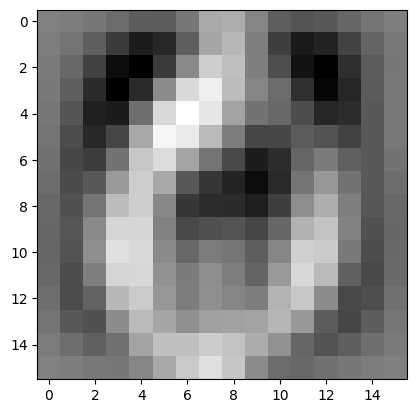

In [14]:
svm_classifier_10 = SVC(kernel='linear', C=1.0) 
train_data_pos_pca_10,autovetores_usados_10 = Pca_data(train_data,10)
plt.imshow((train_data_pos_pca_10 @ autovetores_usados_10.T)[0].reshape(16,16), cmap='gray')
plt.show()

In [15]:
svm_classifier_10.fit(train_data_pos_pca_10, train_label)

SVC(kernel='linear')

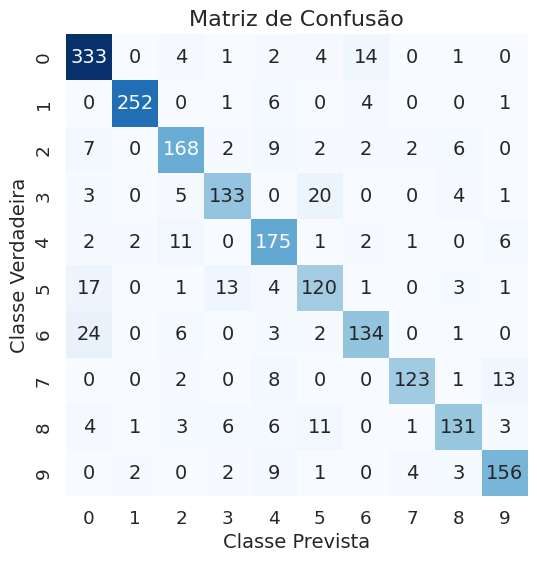


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       359
           1       0.98      0.95      0.97       264
           2       0.84      0.85      0.84       198
           3       0.84      0.80      0.82       166
           4       0.79      0.88      0.83       200
           5       0.75      0.75      0.75       160
           6       0.85      0.79      0.82       170
           7       0.94      0.84      0.88       147
           8       0.87      0.79      0.83       166
           9       0.86      0.88      0.87       177

    accuracy                           0.86      2007
   macro avg       0.86      0.85      0.85      2007
weighted avg       0.86      0.86      0.86      2007



In [16]:
test_data_pos_pca_10 = Aplicar_Pca_teste(test_data, autovetores_usados_10)
y_pred_10 = svm_classifier_10.predict(test_data_pos_pca_10)
y_preds.append(y_pred_10)
Avaliar_resultado(y_pred_10)

#### K = 15

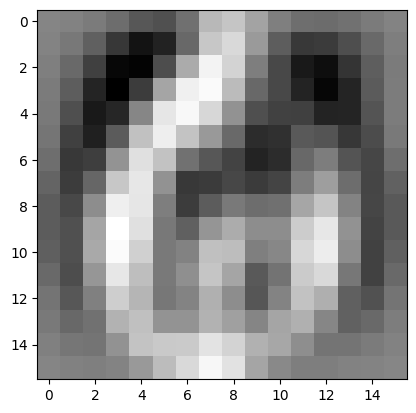

In [17]:
svm_classifier_15 = SVC(kernel='linear', C=1.0) 
train_data_pos_pca_15,autovetores_usados_15 = Pca_data(train_data,15)
plt.imshow((train_data_pos_pca_15 @ autovetores_usados_15.T)[0].reshape(16,16), cmap='gray')
plt.show()

In [18]:
svm_classifier_15.fit(train_data_pos_pca_15, train_label)

SVC(kernel='linear')

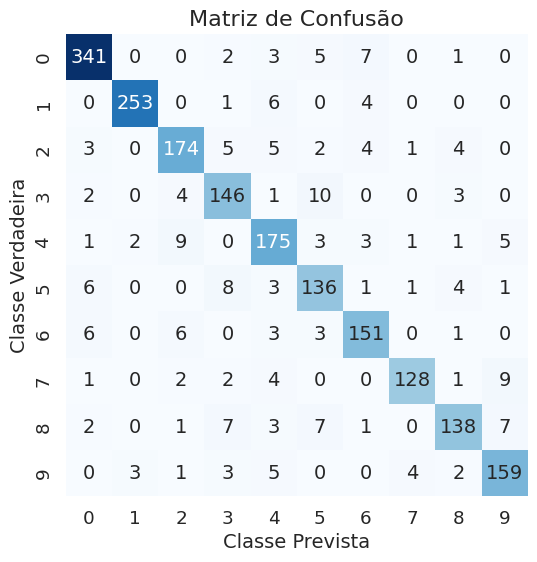


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       359
           1       0.98      0.96      0.97       264
           2       0.88      0.88      0.88       198
           3       0.84      0.88      0.86       166
           4       0.84      0.88      0.86       200
           5       0.82      0.85      0.83       160
           6       0.88      0.89      0.89       170
           7       0.95      0.87      0.91       147
           8       0.89      0.83      0.86       166
           9       0.88      0.90      0.89       177

    accuracy                           0.90      2007
   macro avg       0.89      0.89      0.89      2007
weighted avg       0.90      0.90      0.90      2007



In [19]:
test_data_pos_pca_15 = Aplicar_Pca_teste(test_data, autovetores_usados_15)
y_pred_15 = svm_classifier_15.predict(test_data_pos_pca_15)
y_preds.append(y_pred_15)
Avaliar_resultado(y_pred_15)

#### K = 20

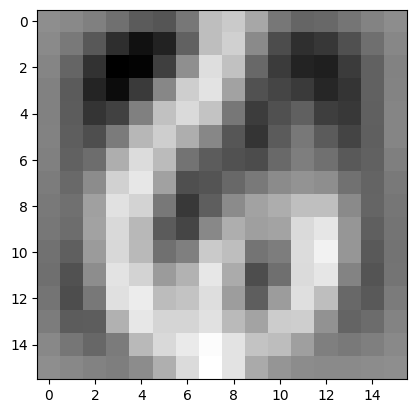

In [20]:
svm_classifier_20 = SVC(kernel='linear', C=1.0) 
train_data_pos_pca_20,autovetores_usados_20 = Pca_data(train_data,20)
plt.imshow((train_data_pos_pca_20 @ autovetores_usados_20.T)[0].reshape(16,16), cmap='gray')
plt.show()

In [21]:
svm_classifier_20.fit(train_data_pos_pca_20, train_label)

SVC(kernel='linear')

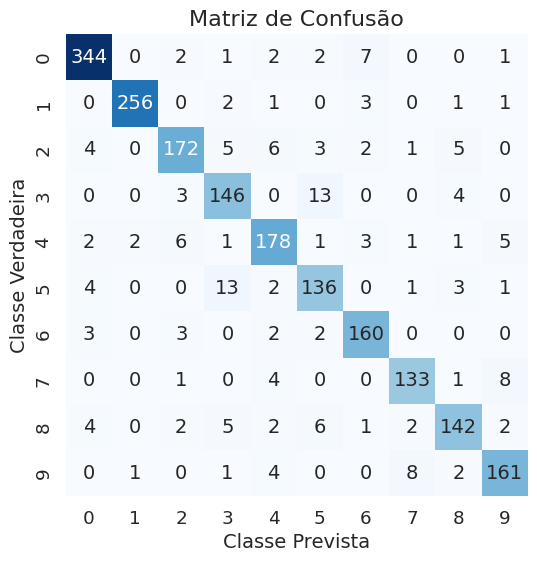


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       359
           1       0.99      0.97      0.98       264
           2       0.91      0.87      0.89       198
           3       0.84      0.88      0.86       166
           4       0.89      0.89      0.89       200
           5       0.83      0.85      0.84       160
           6       0.91      0.94      0.92       170
           7       0.91      0.90      0.91       147
           8       0.89      0.86      0.87       166
           9       0.90      0.91      0.90       177

    accuracy                           0.91      2007
   macro avg       0.90      0.90      0.90      2007
weighted avg       0.91      0.91      0.91      2007



In [22]:
test_data_pos_pca_20 = Aplicar_Pca_teste(test_data, autovetores_usados_20)
y_pred_20 = svm_classifier_20.predict(test_data_pos_pca_20)
y_preds.append(y_pred_20)
Avaliar_resultado(y_pred_20)

### Tabela final com médias

In [34]:
results = []

i = 0

for y_pred in y_preds:
    report = classification_report(test_label, y_pred, output_dict=True)
    accuracy = accuracy_score(test_label, y_pred)
    i = i + 5
    results.append({
        'K':i,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1-score': report['macro avg']['f1-score'],
        'Accuracy': accuracy
    })
    
df_results = pd.DataFrame(results)

print("Tabela Final:\n")
df_results

Tabela Final:



,K,Precision,Recall,F1-score,Accuracy
0,5,0.739802,0.732748,0.735595,0.756851
1,10,0.857744,0.845229,0.850390,0.859492
2,15,0.890553,0.888011,0.888881,0.897359
3,20,0.902296,0.902708,0.902317,0.910812
